In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.decomposition import PCA, TruncatedSVD
import sklearn.datasets as datasets
from IPython.display import Image

<div class="alert alert-block alert-warning">

### Apply SVD on face images


</div>

# Read images into trian and test

In [2]:
data_dir = 'att_faces'

In [3]:
train_faces = []
test_faces = []
train_labels = []
test_labels = []
for i in range(1,41):
    current_dir = data_dir + '/s' +str(i)
    for j in range(1,8):
        current_image = current_dir + '/' +str(j) +'.pgm'
        im = cv2.imread(current_image,0)
        train_faces.append(im)
        train_labels.append(i)
    for j in range(8,11):
        current_image = current_dir + '/' +str(j) +'.pgm'
        im = cv2.imread(current_image,0)
        test_faces.append(im)
        test_labels.append(i)

In [4]:
len(train_faces)

280

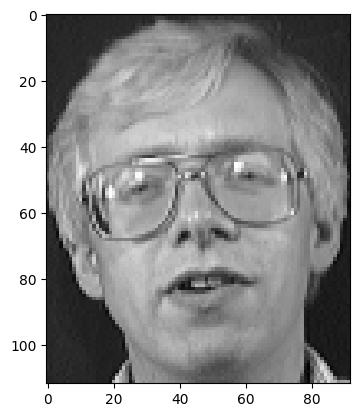

In [6]:
plt.imshow(train_faces[7],'gray')

In [7]:
train_faces[7].shape

(112, 92)

In [8]:
train_faces = np.array(train_faces)
test_faces = np.array(test_faces)

In [9]:
train_faces.shape

(280, 112, 92)

In [10]:
train_faces = train_faces.reshape(train_faces.shape[0],train_faces.shape[1]*train_faces.shape[2])
test_faces = test_faces.reshape(test_faces.shape[0],test_faces.shape[1]*test_faces.shape[2])

In [11]:
train_faces.shape


(280, 10304)

### Apply PCA on faces to obtain eigenvalues and eigenvectors

In [12]:
# Compute a PCA 
n_components = 250
pca = PCA(n_components=n_components, whiten=True).fit(train_faces)
 
# apply PCA transformation
X_train_pca = pca.transform(train_faces)
X_test_pca= pca.transform(test_faces)

In [13]:
X_train_pca.shape

(280, 250)

In [14]:
pca.components_.shape

(250, 10304)

In [15]:
eigenfaces = pca.components_.reshape(250,112,92)

In [16]:
np.dot(pca.components_[5],pca.components_[13])

3.469446951953614e-17

In [17]:
eigenfaces.shape

(250, 112, 92)

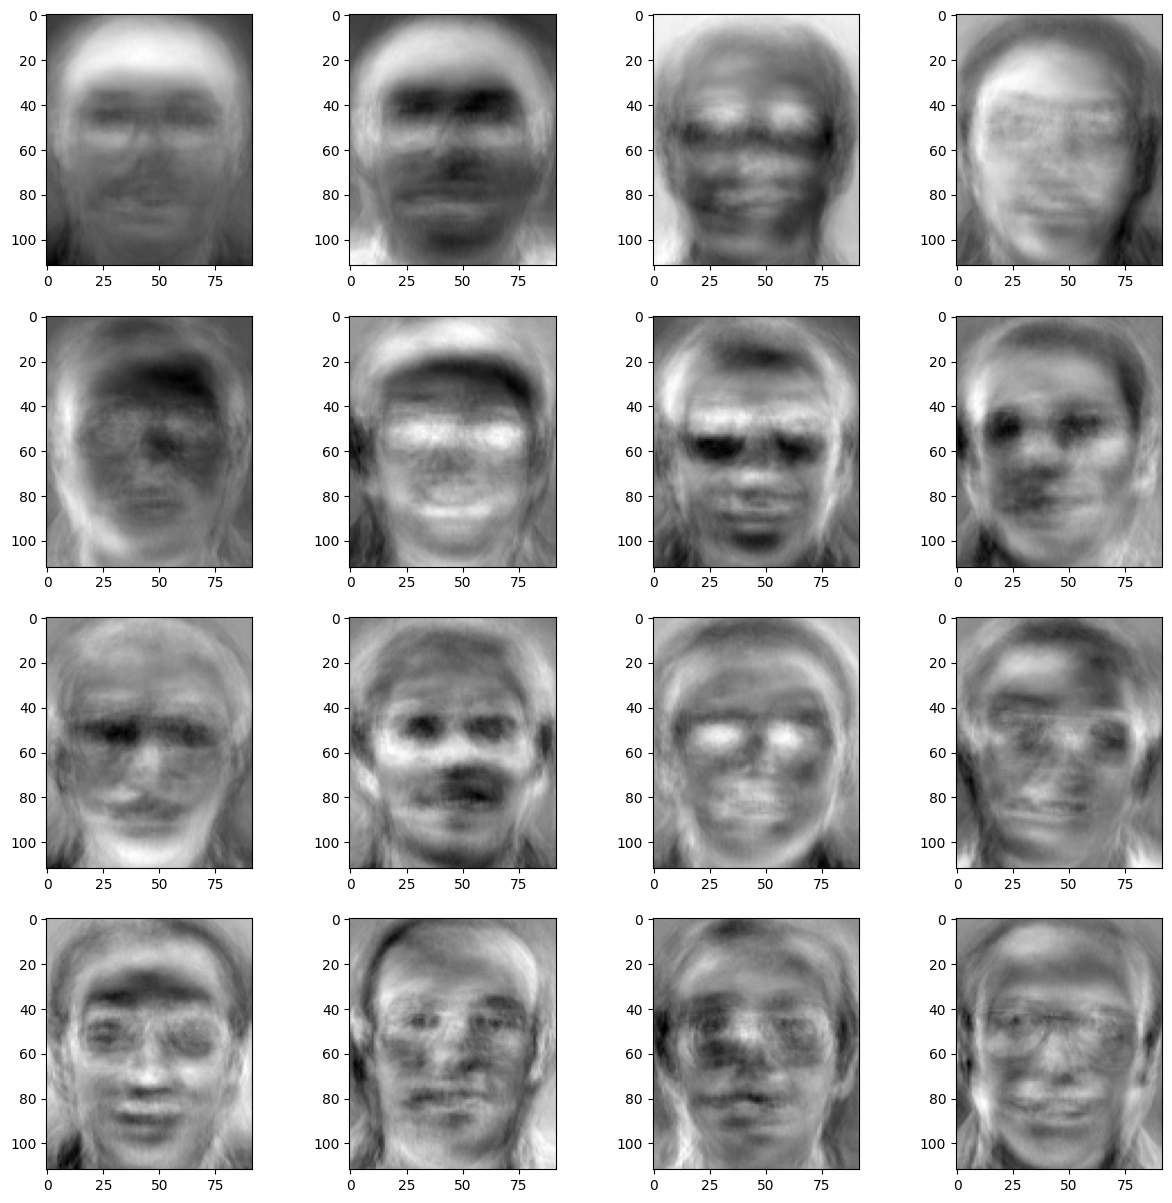

In [18]:
fix, ax = plt.subplots(4,4,figsize=(15,15))
for i in range(4):
    for j in range(4):
        ax[i,j].imshow(eigenfaces[i*4 + j],'gray')

In [19]:
X_train1 = pca.inverse_transform(X_train_pca)

In [20]:
X_train_pca.shape

(280, 250)

In [21]:
X_train1.shape

(280, 10304)

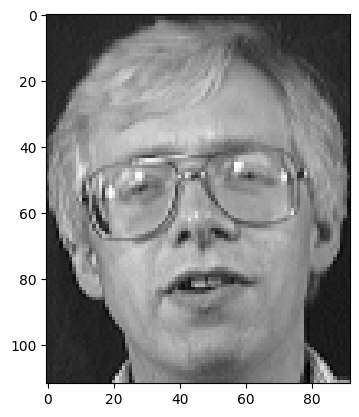

In [22]:
plt.imshow(X_train1[7].reshape(112,92),'gray')

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task1

Find the eigenvectors (eigenfaces) and eigenvalues with SVD for the above face dataset

</div>

In [23]:
n_components = 250
svd = TruncatedSVD(n_components=n_components).fit(train_faces)
 
# apply truncatedSVD transformation
X_train_svd = svd.transform(train_faces)
X_test_svd = svd.transform(test_faces)

In [24]:
eigenfaces_svd = svd.components_.reshape(250,112,92)

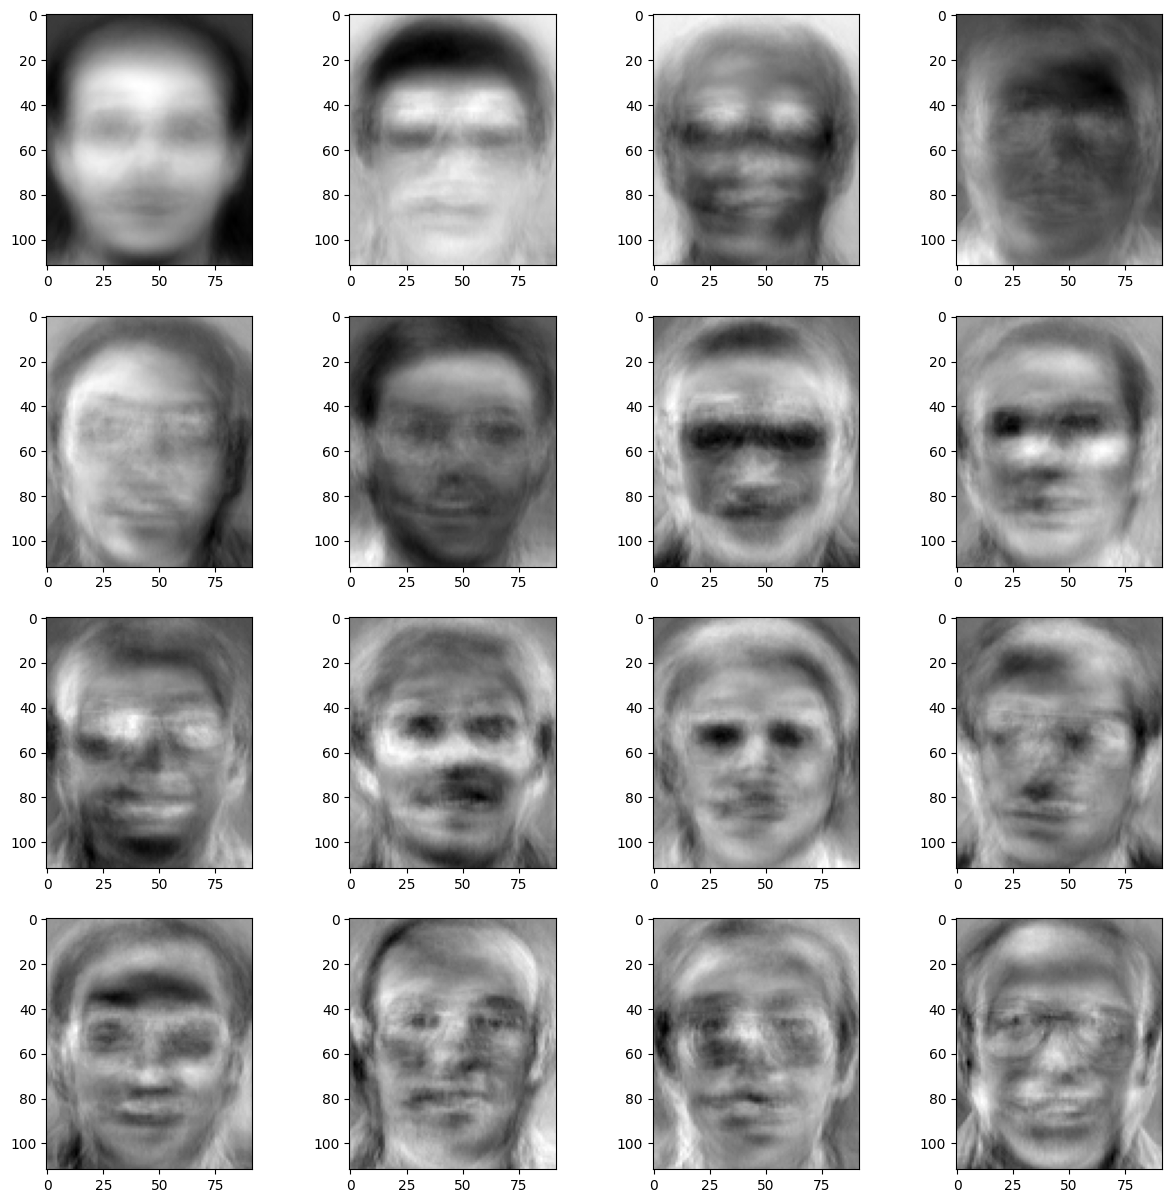

In [25]:
fix, ax = plt.subplots(4,4,figsize=(15,15))
for i in range(4):
    for j in range(4):
        ax[i,j].imshow(eigenfaces_svd[i*4 + j],'gray')

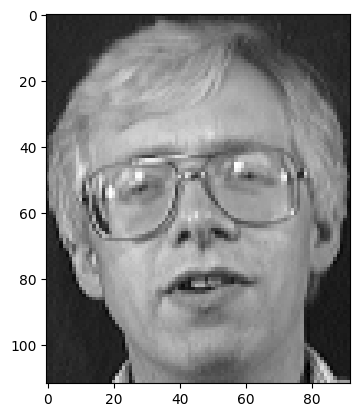

In [26]:
X_train2 = svd.inverse_transform(X_train_svd)

plt.imshow(X_train2[7].reshape(112,92),'gray')

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task1_1

- Apply KNN(1NN) on the original faces(not reduced ones) and calculate the accuracy for the test set.

- Apply KNN(1NN) on the reduced feature space(after PCA) and calculate the accuracy for the test set.

Compare the result of the two approaches.



</div>

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(train_faces, train_labels)

knn.score(test_faces, test_labels)

0.95

In [28]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_pca, train_labels)

knn.score(X_test_pca, test_labels)

0.6

<div class="alert alert-block alert-warning">

### Decision tree visualiztion and rules extraction


</div>

In [29]:
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target

In [30]:
np.unique(y)

array([0, 1, 2])

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtree=DecisionTreeClassifier()
dtree.fit(df,y)

DecisionTreeClassifier()

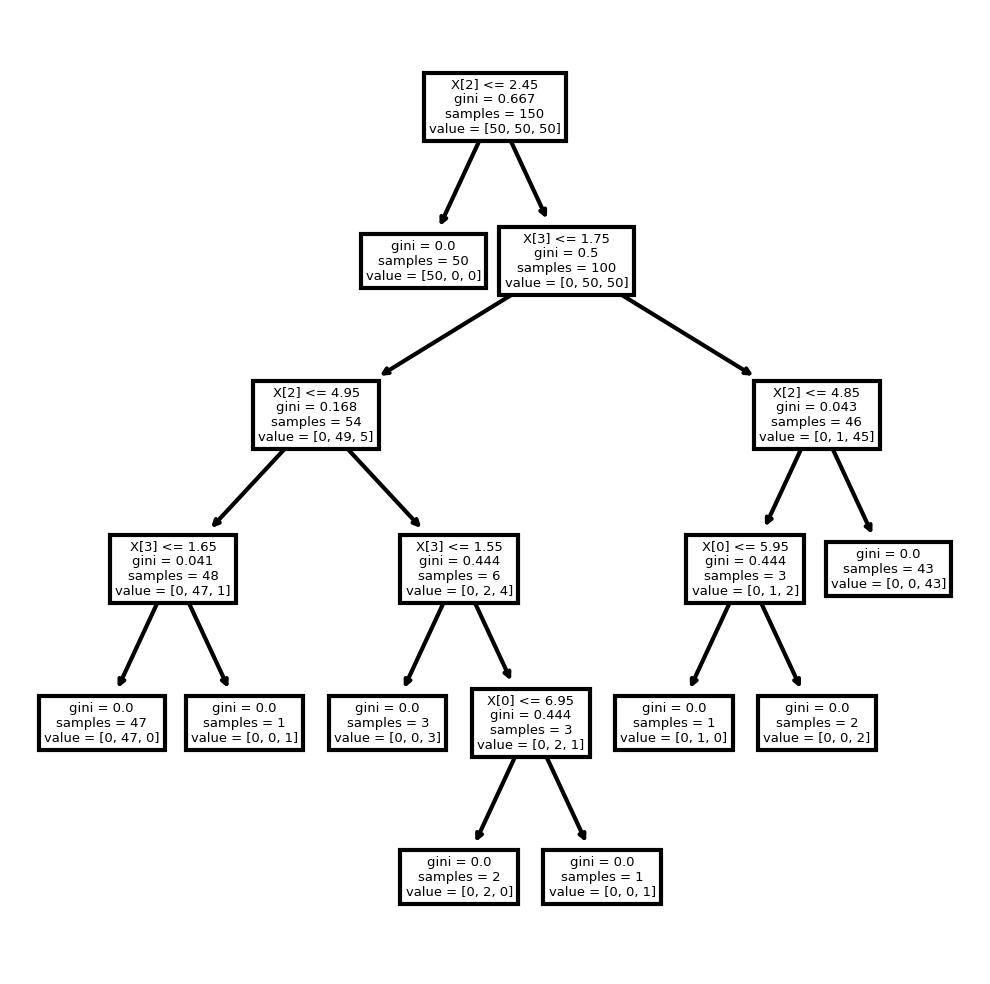

In [32]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dtree);
fig.savefig('imagename.png')

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task2

Find the two most important features according to the decision tree output.

</div>

In [33]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [34]:
dtree.feature_importances_

array([0.02666667, 0.        , 0.55072262, 0.42261071])

In [35]:
# petal lenght(cm) and petal width(cm) are two important features

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task3

Train a decision tree based on the two most important features, and plot the decision boundary including data samples.

</div>

In [36]:
impFeatures = df.iloc[:, 2:]
impFeatures.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


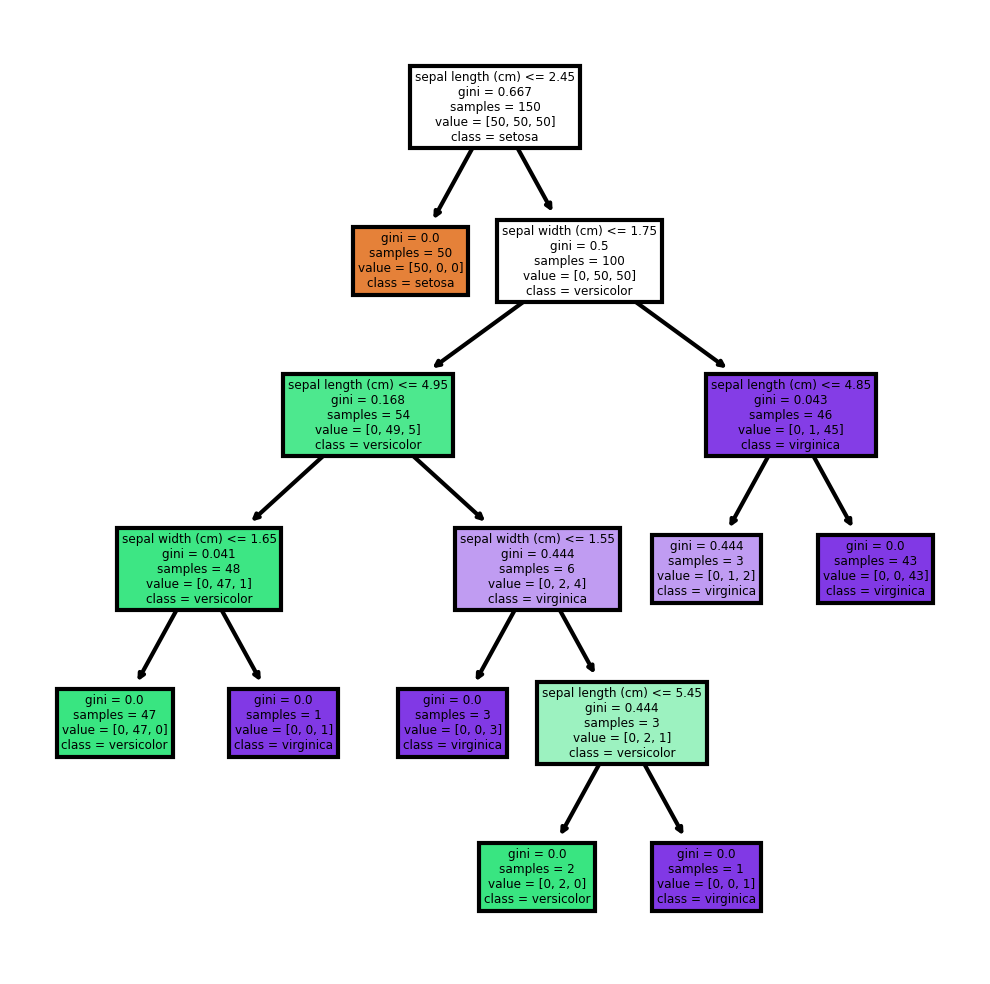

In [38]:
impFeaturesDTree = DecisionTreeClassifier()
impFeaturesDTree.fit(impFeatures, y)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(impFeaturesDTree, feature_names=iris.feature_names, class_names = iris.target_names, filled=True)
fig.savefig('imagename.png')

<div class="alert alert-block alert-warning">

### Bayesian Network


</div>

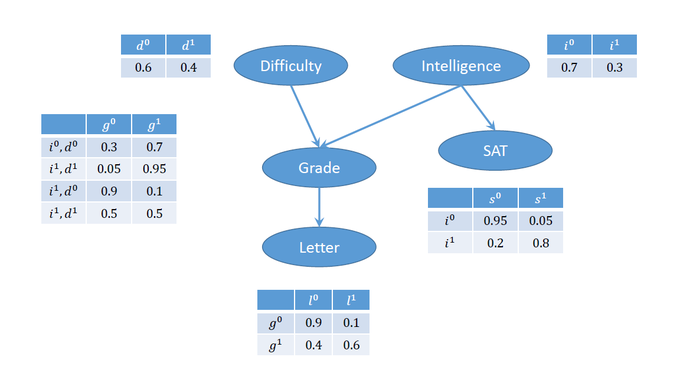

In [ ]:
Image("Images/Student model.png")

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task4

In the student model Bayesin network write codes to calculate the followings.

- Join probability of Difficulty and Intelligence
- Join probability of Difficulty and Intelligence given Grade

For each of the two joint probability check to see if the joint probability can be factorized.

</div>

In [ ]:
!pip install pgmpy

from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.factors.discrete import JointProbabilityDistribution
from pgmpy.inference import VariableElimination

studentModel = BayesianModel([('Difficulty','Grade'),('Intelligence','Grade'),('Intelligence','SAT'),('Grade','Letter')])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 5.2 MB/s 


/usr/local/lib/python3.7/dist-packages/pgmpy/models/BayesianModel.py:10: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  FutureWarning,


In [ ]:
cpDifficulty = TabularCPD(variable='Difficulty', variable_card=2,values=[[0.6],[0.4]])
cpIntelligence = TabularCPD(variable='Intelligence', variable_card=2,values=[[0.7],[0.3]])
cpGrades = TabularCPD(variable='Grade', variable_card=2,values=[[0.3,0.05,0.9,0.5],[0.7,0.95,0.1,0.5]], evidence=['Difficulty','Intelligence'],evidence_card=[2,2])
cpSAT = TabularCPD(variable='SAT',variable_card=2,values=[[0.95,0.2],[0.05,0.8]],evidence=['Intelligence'], evidence_card=[2])
cpLetter = TabularCPD(variable='Letter',variable_card=2,values=[[0.9,0.4],[0.1,0.6]],evidence=['Grade'], evidence_card=[2])

In [ ]:
studentModel.add_cpds(cpDifficulty,cpIntelligence,cpGrades,cpSAT,cpLetter)
studentModel.check_model()

True

In [ ]:
studentModel.get_independencies()

(Grade ⟂ SAT | Intelligence)
(Grade ⟂ SAT | Letter, Intelligence)
(Grade ⟂ SAT | Intelligence, Difficulty)
(Grade ⟂ SAT | Letter, Intelligence, Difficulty)
(Letter ⟂ Intelligence, SAT, Difficulty | Grade)
(Letter ⟂ SAT | Intelligence)
(Letter ⟂ SAT, Difficulty | Grade, Intelligence)
(Letter ⟂ Intelligence, Difficulty | Grade, SAT)
(Letter ⟂ Intelligence, SAT | Grade, Difficulty)
(Letter ⟂ SAT | Intelligence, Difficulty)
(Letter ⟂ Difficulty | Grade, Intelligence, SAT)
(Letter ⟂ SAT | Grade, Intelligence, Difficulty)
(Letter ⟂ Intelligence | Grade, SAT, Difficulty)
(SAT ⟂ Difficulty)
(SAT ⟂ Letter | Grade)
(SAT ⟂ Grade, Letter, Difficulty | Intelligence)
(SAT ⟂ Letter, Difficulty | Grade, Intelligence)
(SAT ⟂ Letter | Grade, Difficulty)
(SAT ⟂ Grade, Difficulty | Letter, Intelligence)
(SAT ⟂ Grade, Letter | Intelligence, Difficulty)
(SAT ⟂ Difficulty | Grade, Letter, Intelligence)
(SAT ⟂ Letter | Grade, Intelligence, Difficulty)
(SAT ⟂ Grade | Letter, Intelligence, Difficulty)
(Intellig

In [ ]:
infer = VariableElimination(studentModel)
difficulty = infer.query(['Difficulty'])
print(difficulty)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+---------------+-------------------+
| Difficulty    |   phi(Difficulty) |
+===============+===================+
| Difficulty(0) |            0.6000 |
+---------------+-------------------+
| Difficulty(1) |            0.4000 |
+---------------+-------------------+


In [ ]:
intelligence = infer.query(['Intelligence'])
print(intelligence)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+-----------------+---------------------+
| Intelligence    |   phi(Intelligence) |
+=================+=====================+
| Intelligence(0) |              0.7000 |
+-----------------+---------------------+
| Intelligence(1) |              0.3000 |
+-----------------+---------------------+


In [ ]:
joinProDist = difficulty * intelligence
print(joinProDist)

+---------------+-----------------+--------------------------------+
| Difficulty    | Intelligence    |   phi(Difficulty,Intelligence) |
+===============+=================+================================+
| Difficulty(0) | Intelligence(0) |                         0.4200 |
+---------------+-----------------+--------------------------------+
| Difficulty(0) | Intelligence(1) |                         0.1800 |
+---------------+-----------------+--------------------------------+
| Difficulty(1) | Intelligence(0) |                         0.2800 |
+---------------+-----------------+--------------------------------+
| Difficulty(1) | Intelligence(1) |                         0.1200 |
+---------------+-----------------+--------------------------------+


In [ ]:
# The probability of joint probablity distribution will 0.12

In [ ]:
difficultyGivenGrade = infer.query(['Difficulty'],evidence={'Grade':1})
print(difficultyGivenGrade)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

+---------------+-------------------+
| Difficulty    |   phi(Difficulty) |
+===============+===================+
| Difficulty(0) |            0.8409 |
+---------------+-------------------+
| Difficulty(1) |            0.1591 |
+---------------+-------------------+


In [ ]:
intelligenceGivenGrade = infer.query(['Intelligence'],evidence={'Grade':1})
print(intelligenceGivenGrade)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

+-----------------+---------------------+
| Intelligence    |   phi(Intelligence) |
+=================+=====================+
| Intelligence(0) |              0.5823 |
+-----------------+---------------------+
| Intelligence(1) |              0.4177 |
+-----------------+---------------------+


In [ ]:
joinProDistGrade = difficultyGivenGrade * intelligenceGivenGrade
print(joinProDistGrade)

+---------------+-----------------+--------------------------------+
| Difficulty    | Intelligence    |   phi(Difficulty,Intelligence) |
+===============+=================+================================+
| Difficulty(0) | Intelligence(0) |                         0.4896 |
+---------------+-----------------+--------------------------------+
| Difficulty(0) | Intelligence(1) |                         0.3512 |
+---------------+-----------------+--------------------------------+
| Difficulty(1) | Intelligence(0) |                         0.0927 |
+---------------+-----------------+--------------------------------+
| Difficulty(1) | Intelligence(1) |                         0.0665 |
+---------------+-----------------+--------------------------------+


In [ ]:
# The joint probablity distribution in this scenerio will be 0.0665

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task5

In the student model Bayesin network write codes to calculate the followings.

- Join probability of Grade and SAT
- Join probability of Grade and SAT given Intelligence

For each of the two joint probability check to see if the joint probability can be factorized.

</div>

In [14]:
gradeDistribution = infer.query(['Grade'])
print(gradeDistribution)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+----------+--------------+
| Grade    |   phi(Grade) |
+==========+==============+
| Grade(0) |       0.4470 |
+----------+--------------+
| Grade(1) |       0.5530 |
+----------+--------------+


In [15]:
satDistribution = infer.query(['SAT'])
print(satDistribution)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

+--------+------------+
| SAT    |   phi(SAT) |
+========+============+
| SAT(0) |     0.7250 |
+--------+------------+
| SAT(1) |     0.2750 |
+--------+------------+


In [17]:
jointProDist = gradeDistribution * satDistribution
print(jointProDist)

+----------+--------+------------------+
| Grade    | SAT    |   phi(Grade,SAT) |
+==========+========+==================+
| Grade(0) | SAT(0) |           0.3241 |
+----------+--------+------------------+
| Grade(0) | SAT(1) |           0.1229 |
+----------+--------+------------------+
| Grade(1) | SAT(0) |           0.4009 |
+----------+--------+------------------+
| Grade(1) | SAT(1) |           0.1521 |
+----------+--------+------------------+


In [19]:
gradeGivenIntelligence = infer.query(['Grade'],evidence={'Intelligence':1})
print(gradeGivenIntelligence)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

+----------+--------------+
| Grade    |   phi(Grade) |
+==========+==============+
| Grade(0) |       0.2300 |
+----------+--------------+
| Grade(1) |       0.7700 |
+----------+--------------+


In [20]:
satGivenIntelligence = infer.query(['SAT'],evidence={'Intelligence':1})
print(satGivenIntelligence)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+--------+------------+
| SAT    |   phi(SAT) |
+========+============+
| SAT(0) |     0.2000 |
+--------+------------+
| SAT(1) |     0.8000 |
+--------+------------+


In [21]:
jointProbDist_per_Intelligence = gradeGivenIntelligence * satGivenIntelligence
print(jointProbDist_per_Intelligence)

+----------+--------+------------------+
| Grade    | SAT    |   phi(Grade,SAT) |
+==========+========+==================+
| Grade(0) | SAT(0) |           0.0460 |
+----------+--------+------------------+
| Grade(0) | SAT(1) |           0.1840 |
+----------+--------+------------------+
| Grade(1) | SAT(0) |           0.1540 |
+----------+--------+------------------+
| Grade(1) | SAT(1) |           0.6160 |
+----------+--------+------------------+


In [ ]:
# The joint probability distribution in this scenerio will be 0.6160

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task6

In the student model Bayesin network write codes to calculate the followings.

- Join probability of Letter and Difficulty
- Join probability of Letter and Difficulty Grade

For each of the two joint probability check to see if the joint probability can be factorized.

</div>

In [22]:
letterDist = infer.query(['Letter'])
print(letterDist)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

+-----------+---------------+
| Letter    |   phi(Letter) |
+===========+===============+
| Letter(0) |        0.6235 |
+-----------+---------------+
| Letter(1) |        0.3765 |
+-----------+---------------+


In [23]:
jointProbDist = letterDist * difficulty
print(jointProbDist)

+-----------+---------------+--------------------------+
| Letter    | Difficulty    |   phi(Letter,Difficulty) |
+===========+===============+==========================+
| Letter(0) | Difficulty(0) |                   0.3741 |
+-----------+---------------+--------------------------+
| Letter(0) | Difficulty(1) |                   0.2494 |
+-----------+---------------+--------------------------+
| Letter(1) | Difficulty(0) |                   0.2259 |
+-----------+---------------+--------------------------+
| Letter(1) | Difficulty(1) |                   0.1506 |
+-----------+---------------+--------------------------+


In [ ]:
# The joint probability distribution in this scenerio is 0.1506

In [25]:
letterDist_per_Grade = infer.query(['Letter'], evidence={'Grade':1})
print(letterDist_per_Grade)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+-----------+---------------+
| Letter    |   phi(Letter) |
+===========+===============+
| Letter(0) |        0.4000 |
+-----------+---------------+
| Letter(1) |        0.6000 |
+-----------+---------------+


In [27]:
jointProbDist_per_Grade = letterDist_per_Grade * difficultyGivenGrade
print(jointProbDist_per_Grade)

+-----------+----------+---------------------+
| Letter    | Grade    |   phi(Letter,Grade) |
+===========+==========+=====================+
| Letter(0) | Grade(0) |              0.0920 |
+-----------+----------+---------------------+
| Letter(0) | Grade(1) |              0.3080 |
+-----------+----------+---------------------+
| Letter(1) | Grade(0) |              0.1380 |
+-----------+----------+---------------------+
| Letter(1) | Grade(1) |              0.4620 |
+-----------+----------+---------------------+


In [ ]:
# The joint probability distribution in this scenerio is 0.4620